In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy.spatial import distance
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
import scipy.stats
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import array
import copy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import mglearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
print("sorryvogliovederedoveprinta")

In [47]:
def evaluatorclassifier(model, X_test, y_test, X_train, y_train):
    y_class = model.predict(X_test)
    print("Train set score: {:.2f}".format(model.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
    if isinstance(model, GridSearchCV):
        print("Best parameters: {}".format(model.best_params_))
        print("Best cross-validation score: {:.2f}".format(model.best_score_))
    print("f1 score: {:.2f}".format(f1_score(y_test, y_class, average="weighted")))
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_class)))
    print(classification_report(y_test, y_class))
    scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, y_class), 
                                     xlabel='Predicted label',ylabel='True label', 
                                     xticklabels=y_test.unique(),
                                     yticklabels=y_test.unique(), 
                                     cmap=plt.cm.gray_r, fmt="%d")
    plt.title("Confusion matrix")
    plt.gca().invert_yaxis()

def scalerandencoder(df):
    df_train_float = df.select_dtypes(exclude="object")
    coll = df_train_float.columns
    scaler = preprocessing.StandardScaler().fit(df_train_float)
    df_train_float = scaler.transform(df_train_float)
    df_train_float = pd.DataFrame(df_train_float)
    # renaming the columns after the scaling
    df_train_float.columns = coll

    df_train_cat = df.select_dtypes(include="object")
    id_train = df_train_cat["ID"]
    df_train_cat.drop("ID", axis=1, inplace=True)
    ord_enc = OrdinalEncoder()
    df_train_cat["Attack"] = ord_enc.fit_transform(df_train_cat[["Attack"]])
    df_train_cat["Deadly"] = ord_enc.fit_transform(df_train_cat[["Deadly"]])
    df_train_cat["Gormiti_Land"] = ord_enc.fit_transform(df_train_cat[["Gormiti_Land"]])
    deadly = df_train_cat["Deadly"]
    attack = df_train_cat["Attack"]
    land = df_train_cat["Gormiti_Land"]
    df_train_cat.drop("Deadly", axis=1, inplace=True)
    df_train_cat.drop("Attack", axis=1, inplace=True)
    df_train_cat.drop("Gormiti_Land", axis=1, inplace=True)
    df_train_cat = pd.get_dummies(df_train_cat)
    df_train_cat["Attack"] = attack
    df_train_cat["Deadly"] = deadly
    df_train_cat["Gormiti_Land"] = land
    df = pd.concat([df_train_cat, df_train_float], axis=1)
    return df

def outlierdropper(df):
    colmn = df.columns
    for i in colmn:
        if df[i].dtype == 'float64' or df[i].dtype == 'int64':
            k = 2.5
            upper = df[i].mean() + df[i].std() * k
            lower = df[i].mean() - df[i].std() * k
            df = df[(df[i] < upper) & (df[i] > lower)]
    return df

# 1. Load and explore the dataset. Eventually perform data engineering (handling missing values, encoding categorical values, ...).

In [48]:
df_train = pd.read_csv("Gormiti_train.csv")
df_train

,Unnamed: 0,ID,Gormiti_Type,Nature,Deadly,Growth_rate,Attack,Strength,Ray,Ability,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock,Gormiti_Land
0,0,580a08ea-4db6-46ba-b5f1-21f8dfcfa2b0,Fire,Evil,Yes,Slow,Yes,59.0,Omega,stalagmites,-1.020907,-0.198581,-2.994943,-1.596865,-0.164760,Iceland
1,1,efdc2c72-834e-44d3-acf1-8b83a6bd0760,Fire,Evil,No,Medium,Yes,40.0,Beta,Dark bullets,-1.671520,-0.516204,0.600385,0.116257,0.550372,Windland
2,2,e3878403-c13b-4f6f-8e87-a1e72ea2e71c,Wind,Evil,Yes,Fast,Yes,52.0,Alpha,Dark bullets,1.374496,-0.498522,0.097014,2.162580,-1.017195,Iceland
3,3,1d5c102b-47a9-40fd-80b9-96ab8d7b2b7b,Wind,Evil,No,Medium,No,36.0,Alpha,Meka energy,-0.340917,-1.741547,-1.269091,-1.211137,-2.840029,Rockland
4,4,8093fb82-8692-4352-b213-e4d18074fc18,Rock,Good,No,Medium,Yes,58.0,Gamma,whirlwind,1.472178,-1.313746,-1.670818,-2.643774,0.991630,Fireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,0c50046e-8397-4ac1-a528-f87654a912ef,Aoki,Good,No,Medium,No,41.0,Gamma,Burning energy,0.723469,-1.909741,0.671805,0.080248,-0.690939,Rockland
7996,7996,64ceeaa4-a419-4e46-b1cc-b8befa447eb3,Sea,Good,Yes,Medium,No,41.0,Gamma,whirlwind,2.070754,0.348883,-1.141936,-1.845884,1.022508,Fireland
7997,7997,e28f5bfe-c2a2-4bf8-b699-1f00b1f50bbb,Fearsome Darkens,Evil,No,Slow,Yes,55.0,Omega,whirlwind,1.733139,-0.468651,2.065541,-0.648536,-3.644766,Windland
7998,7998,9ddc67a9-d8b7-416e-8ed1-195b6ac9dc5e,Sea,Evil,Yes,Medium,No,50.0,Gamma,Magical light power,-0.951960,2.022711,-3.837023,3.000448,-2.363179,Iceland


In [49]:
df_test = pd.read_csv("Gormiti_test.csv")
df_test

,Unnamed: 0,ID,Gormiti_Type,Nature,Deadly,Growth_rate,Attack,Strength,Ray,Ability,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock,Gormiti_Land
0,0,091a504d-521f-4ccf-b910-ec1041905d6e,Aoki,Evil,Yes,Fast,No,51.0,Alpha,stalagmites,0.421855,-2.681833,1.135186,1.907123,-0.603116,Iceland
1,1,6a5787a5-0af4-4166-bfd9-70a3bbe1957c,Fire,Evil,Yes,Slow,No,60.0,Alpha,Burning energy,1.295014,-1.418908,1.210324,0.372579,-0.446112,Rockland
2,2,ad51110e-563f-4122-a92c-1e0e529efeba,Fearsome Darkens,Good,No,Fast,No,42.0,Omega,stalagmites,-1.570687,0.828706,-3.671664,1.159636,-0.983343,Iceland
3,3,09fcccaa-3777-453f-902c-2cc25d9459d1,Aoki,Evil,No,Fast,No,59.0,Omega,Dark bullets,-1.357277,-1.131796,-0.950394,-0.948838,0.215572,Rockland
4,4,cd372fd7-ef45-4ec2-a7b5-7c001d68b75d,Meka,Good,No,Medium,Yes,52.0,Beta,whirlwind,-0.567937,-3.762130,-0.963888,-1.242648,-0.409619,Fireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,73fd6f38-75b9-4d11-b8d2-d294ede1dc03,Rock,Good,No,Slow,No,41.0,Alpha,Meka energy,-1.262841,0.405344,0.740532,-1.772230,0.266576,Windland
1996,1996,8a5557ee-8c1a-4812-9458-6ae15987a93c,Wind,Good,No,Slow,No,40.0,Gamma,whirlwind,0.232081,-0.496368,-0.878425,0.069013,-1.591982,Iceland
1997,1997,9522532f-62a6-4484-9aed-64882651200d,Ice,Evil,No,Medium,No,39.0,Gamma,stalagmites,0.756009,-0.928642,0.859297,-1.602827,-0.015843,Rockland
1998,1998,4b0ec347-9ad5-461a-901e-5e8303b28736,Sea,Good,Yes,Slow,No,65.0,Alpha,Burning energy,0.199959,0.146354,2.058367,-0.312298,-2.770650,Windland


In [50]:
df_train = df_train.drop("Unnamed: 0", axis=1)
df_test = df_test.drop("Unnamed: 0", axis=1)
df_train

,ID,Gormiti_Type,Nature,Deadly,Growth_rate,Attack,Strength,Ray,Ability,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock,Gormiti_Land
0,580a08ea-4db6-46ba-b5f1-21f8dfcfa2b0,Fire,Evil,Yes,Slow,Yes,59.0,Omega,stalagmites,-1.020907,-0.198581,-2.994943,-1.596865,-0.164760,Iceland
1,efdc2c72-834e-44d3-acf1-8b83a6bd0760,Fire,Evil,No,Medium,Yes,40.0,Beta,Dark bullets,-1.671520,-0.516204,0.600385,0.116257,0.550372,Windland
2,e3878403-c13b-4f6f-8e87-a1e72ea2e71c,Wind,Evil,Yes,Fast,Yes,52.0,Alpha,Dark bullets,1.374496,-0.498522,0.097014,2.162580,-1.017195,Iceland
3,1d5c102b-47a9-40fd-80b9-96ab8d7b2b7b,Wind,Evil,No,Medium,No,36.0,Alpha,Meka energy,-0.340917,-1.741547,-1.269091,-1.211137,-2.840029,Rockland
4,8093fb82-8692-4352-b213-e4d18074fc18,Rock,Good,No,Medium,Yes,58.0,Gamma,whirlwind,1.472178,-1.313746,-1.670818,-2.643774,0.991630,Fireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0c50046e-8397-4ac1-a528-f87654a912ef,Aoki,Good,No,Medium,No,41.0,Gamma,Burning energy,0.723469,-1.909741,0.671805,0.080248,-0.690939,Rockland
7996,64ceeaa4-a419-4e46-b1cc-b8befa447eb3,Sea,Good,Yes,Medium,No,41.0,Gamma,whirlwind,2.070754,0.348883,-1.141936,-1.845884,1.022508,Fireland
7997,e28f5bfe-c2a2-4bf8-b699-1f00b1f50bbb,Fearsome Darkens,Evil,No,Slow,Yes,55.0,Omega,whirlwind,1.733139,-0.468651,2.065541,-0.648536,-3.644766,Windland
7998,9ddc67a9-d8b7-416e-8ed1-195b6ac9dc5e,Sea,Evil,Yes,Medium,No,50.0,Gamma,Magical light power,-0.951960,2.022711,-3.837023,3.000448,-2.363179,Iceland


In [51]:
df_train.describe()

,Strength,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,50.966750,0.484189,-0.986843,-0.513012,-0.517482,-0.518231
std,9.484666,1.636463,1.235982,1.575095,1.711674,1.552168
min,35.000000,-6.116688,-6.403020,-6.592109,-6.670034,-7.065428
25%,43.000000,-0.573518,-1.730210,-1.621934,-1.697078,-1.560249
50%,51.000000,0.600012,-0.991274,-0.434169,-0.659360,-0.630650
75%,59.000000,1.607006,-0.232497,0.718957,0.491765,0.466300
max,67.000000,5.744405,4.300767,4.589191,6.687927,5.479101


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8000 non-null   object 
 1   Gormiti_Type  8000 non-null   object 
 2   Nature        8000 non-null   object 
 3   Deadly        8000 non-null   object 
 4   Growth_rate   8000 non-null   object 
 5   Attack        8000 non-null   object 
 6   Strength      8000 non-null   float64
 7   Ray           8000 non-null   object 
 8   Ability       8000 non-null   object 
 9   Against_Fire  8000 non-null   float64
 10  Against_Meka  8000 non-null   float64
 11  Against_Lava  8000 non-null   float64
 12  Against_Wind  8000 non-null   float64
 13  Against_Rock  8000 non-null   float64
 14  Gormiti_Land  8000 non-null   object 
dtypes: float64(6), object(9)
memory usage: 937.6+ KB


In [53]:
df_train.isnull().sum()

ID              0
Gormiti_Type    0
Nature          0
Deadly          0
Growth_rate     0
Attack          0
Strength        0
Ray             0
Ability         0
Against_Fire    0
Against_Meka    0
Against_Lava    0
Against_Wind    0
Against_Rock    0
Gormiti_Land    0
dtype: int64

In [54]:
df_train.duplicated(keep=False).sum()

0

<AxesSubplot:>

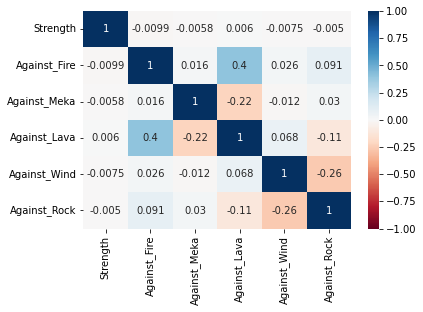

In [55]:
relation = df_train.corr()
sns.heatmap(relation,cmap = 'RdBu',vmin=-1, vmax=1, annot = True)

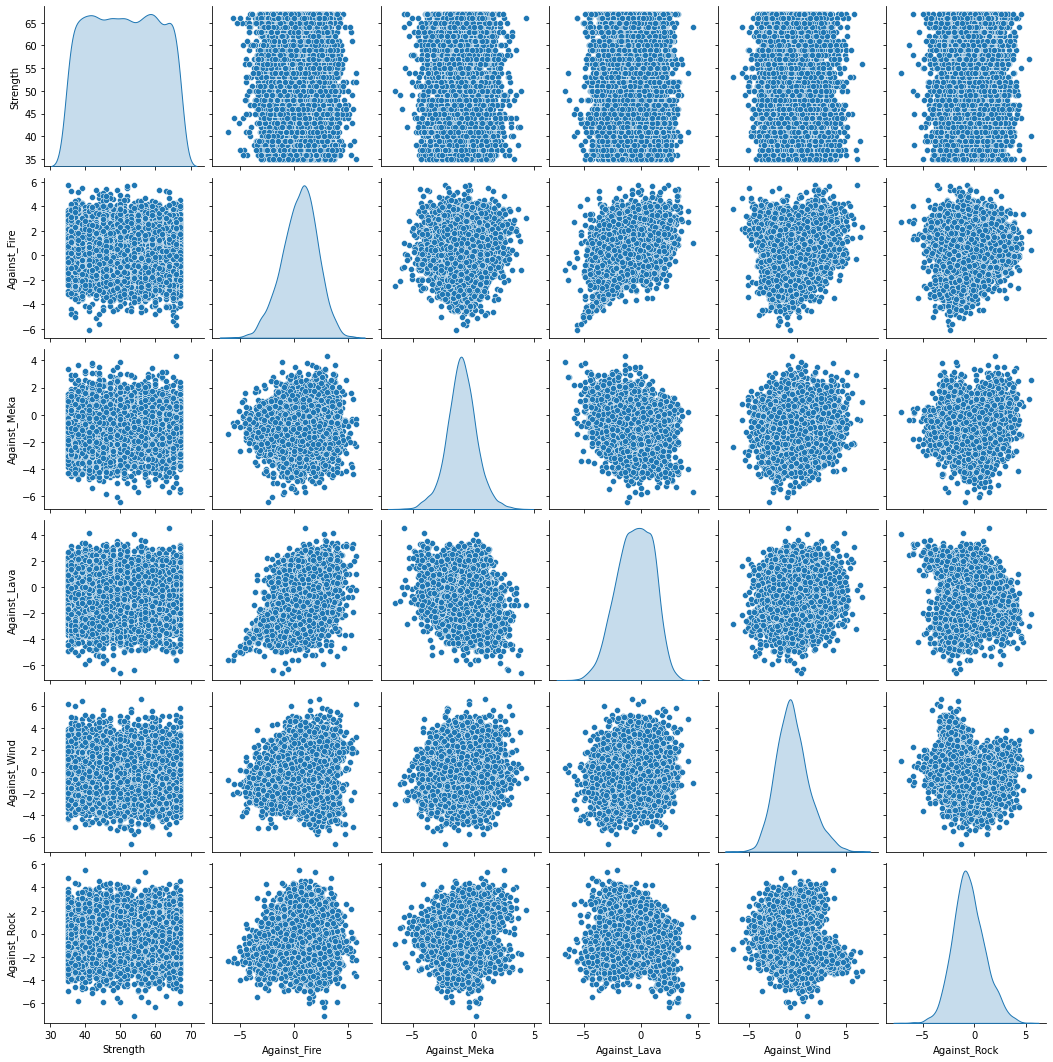

In [56]:
sns.pairplot(data=df_train,kind='scatter',diag_kind='kde')

In [57]:
df_train = scalerandencoder(df_train)
df_train

,Gormiti_Type_Aoki,Gormiti_Type_Fearsome Darkens,Gormiti_Type_Fire,Gormiti_Type_Ice,Gormiti_Type_Lava,Gormiti_Type_Meka,Gormiti_Type_Rock,Gormiti_Type_Sea,Gormiti_Type_Wind,Nature_Evil,...,Ability_whirlwind,Attack,Deadly,Gormiti_Land,Strength,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock
0,0,0,1,0,0,0,0,0,0,1,...,0,1.0,1.0,1.0,0.847025,-0.919782,0.637802,-1.575833,-0.630641,0.227742
1,0,0,1,0,0,0,0,0,0,1,...,0,1.0,0.0,3.0,-1.156333,-1.317380,0.380805,0.706920,0.370268,0.688502
2,0,0,0,0,0,0,0,0,1,1,...,0,1.0,1.0,1.0,0.108946,0.544077,0.395112,0.387319,1.565853,-0.321483
3,0,0,0,0,0,0,0,0,1,1,...,0,0.0,0.0,2.0,-1.578093,-0.504232,-0.610649,-0.480051,-0.405275,-1.495935
4,0,0,0,0,0,0,1,0,0,0,...,1,1.0,0.0,0.0,0.741585,0.603772,-0.264505,-0.735117,-1.242308,0.972804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,2.0,-1.050893,0.146227,-0.746739,0.752266,0.349230,-0.111276
7996,0,0,0,0,0,0,0,1,0,0,...,1,0.0,1.0,0.0,-1.050893,0.969570,1.080767,-0.399318,-0.776132,0.992699
7997,0,1,0,0,0,0,0,0,0,1,...,1,1.0,0.0,3.0,0.425266,0.763249,0.419281,1.637180,-0.076570,-2.014428
7998,0,0,0,0,0,0,0,1,0,1,...,0,0.0,1.0,1.0,-0.101934,-0.877648,2.435102,-2.110488,2.055386,-1.188701


In [58]:
df_test = scalerandencoder(df_test)
df_test

,Gormiti_Type_Aoki,Gormiti_Type_Fearsome Darkens,Gormiti_Type_Fire,Gormiti_Type_Ice,Gormiti_Type_Lava,Gormiti_Type_Meka,Gormiti_Type_Rock,Gormiti_Type_Sea,Gormiti_Type_Wind,Nature_Evil,...,Ability_whirlwind,Attack,Deadly,Gormiti_Land,Strength,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock
0,1,0,0,0,0,0,0,0,0,1,...,0,0.0,1.0,1.0,-0.012133,-0.060617,-1.421845,1.042780,1.400234,-0.100911
1,0,0,1,0,0,0,0,0,0,1,...,0,0.0,1.0,2.0,0.933324,0.475362,-0.363580,1.089936,0.511946,0.001383
2,0,1,0,0,0,0,0,0,0,0,...,0,0.0,0.0,1.0,-0.957591,-1.283718,1.519801,-1.973943,0.967542,-0.348643
3,1,0,0,0,0,0,0,0,0,1,...,0,0.0,0.0,2.0,0.828273,-1.152719,-0.122996,-0.266105,-0.252970,0.432495
4,0,0,0,0,0,1,0,0,0,0,...,1,1.0,0.0,0.0,0.092917,-0.668191,-2.327076,-0.274574,-0.423046,0.025160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,1,0,0,0,...,0,0.0,0.0,3.0,-1.062642,-1.094751,1.165046,0.795100,-0.729600,0.465727
1996,0,0,0,0,0,0,0,0,1,0,...,1,0.0,0.0,1.0,-1.167693,-0.177108,0.409460,-0.220938,0.336224,-0.745195
1997,0,0,0,1,0,0,0,0,0,1,...,0,0.0,0.0,2.0,-1.272744,0.144500,0.047237,0.869636,-0.631539,0.281720
1998,0,0,0,0,0,0,0,1,0,0,...,0,0.0,1.0,3.0,1.458579,-0.196826,0.948026,1.622158,0.115498,-1.513142


In [59]:
df_temp = df_train.iloc[:,-6:]
df_temp

,Strength,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock
0,0.847025,-0.919782,0.637802,-1.575833,-0.630641,0.227742
1,-1.156333,-1.317380,0.380805,0.706920,0.370268,0.688502
2,0.108946,0.544077,0.395112,0.387319,1.565853,-0.321483
3,-1.578093,-0.504232,-0.610649,-0.480051,-0.405275,-1.495935
4,0.741585,0.603772,-0.264505,-0.735117,-1.242308,0.972804
...,...,...,...,...,...,...
7995,-1.050893,0.146227,-0.746739,0.752266,0.349230,-0.111276
7996,-1.050893,0.969570,1.080767,-0.399318,-0.776132,0.992699
7997,0.425266,0.763249,0.419281,1.637180,-0.076570,-2.014428
7998,-0.101934,-0.877648,2.435102,-2.110488,2.055386,-1.188701


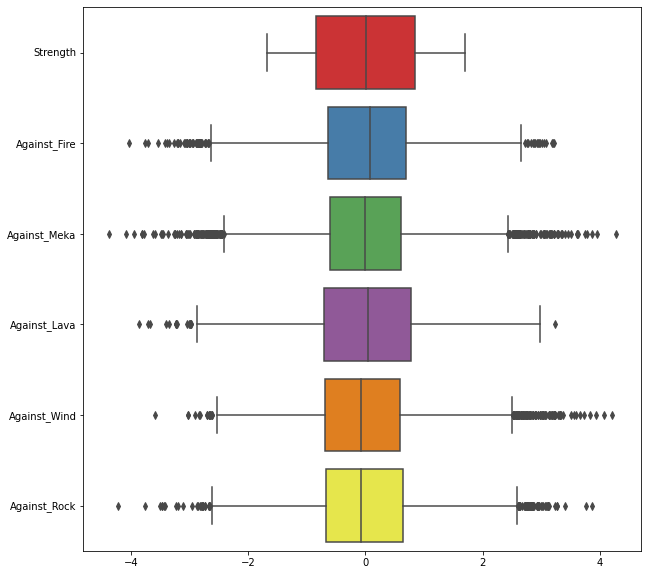

In [60]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_temp, orient="h", palette="Set1")

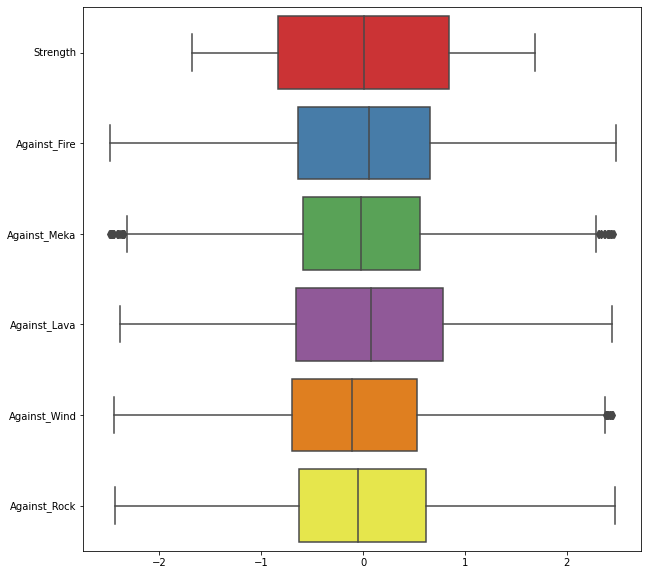

In [61]:
df_train = outlierdropper(df_train)
df_temp = df_train.iloc[:,-6:]
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_temp, orient="h", palette="Set1")

In [62]:
df_train

,Gormiti_Type_Aoki,Gormiti_Type_Fearsome Darkens,Gormiti_Type_Fire,Gormiti_Type_Ice,Gormiti_Type_Lava,Gormiti_Type_Meka,Gormiti_Type_Rock,Gormiti_Type_Sea,Gormiti_Type_Wind,Nature_Evil,...,Ability_whirlwind,Attack,Deadly,Gormiti_Land,Strength,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock
0,0,0,1,0,0,0,0,0,0,1,...,0,1.0,1.0,1.0,0.847025,-0.919782,0.637802,-1.575833,-0.630641,0.227742
1,0,0,1,0,0,0,0,0,0,1,...,0,1.0,0.0,3.0,-1.156333,-1.317380,0.380805,0.706920,0.370268,0.688502
2,0,0,0,0,0,0,0,0,1,1,...,0,1.0,1.0,1.0,0.108946,0.544077,0.395112,0.387319,1.565853,-0.321483
3,0,0,0,0,0,0,0,0,1,1,...,0,0.0,0.0,2.0,-1.578093,-0.504232,-0.610649,-0.480051,-0.405275,-1.495935
4,0,0,0,0,0,0,1,0,0,0,...,1,1.0,0.0,0.0,0.741585,0.603772,-0.264505,-0.735117,-1.242308,0.972804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,2.0,-1.050893,0.146227,-0.746739,0.752266,0.349230,-0.111276
7996,0,0,0,0,0,0,0,1,0,0,...,1,0.0,1.0,0.0,-1.050893,0.969570,1.080767,-0.399318,-0.776132,0.992699
7997,0,1,0,0,0,0,0,0,0,1,...,1,1.0,0.0,3.0,0.425266,0.763249,0.419281,1.637180,-0.076570,-2.014428
7998,0,0,0,0,0,0,0,1,0,1,...,0,0.0,1.0,1.0,-0.101934,-0.877648,2.435102,-2.110488,2.055386,-1.188701


In [63]:
y_train = df_train["Gormiti_Land"]
X_train = df_train.drop("Gormiti_Land", axis=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=22)

In [64]:
X_val

,Gormiti_Type_Aoki,Gormiti_Type_Fearsome Darkens,Gormiti_Type_Fire,Gormiti_Type_Ice,Gormiti_Type_Lava,Gormiti_Type_Meka,Gormiti_Type_Rock,Gormiti_Type_Sea,Gormiti_Type_Wind,Nature_Evil,...,Ability_stalagmites,Ability_whirlwind,Attack,Deadly,Strength,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock
2886,0,0,0,1,0,0,0,0,0,0,...,1,0,0.0,0.0,-0.629134,-1.018939,0.479293,-0.135425,-0.832111,0.443492
2218,0,0,0,0,0,1,0,0,0,0,...,0,0,0.0,0.0,1.268785,-1.021019,1.216404,1.132779,-0.385133,-0.330729
5817,1,0,0,0,0,0,0,0,0,1,...,0,0,0.0,0.0,1.585105,0.306636,-0.774742,0.427761,-0.232231,1.318434
1067,0,0,0,0,0,0,0,1,0,1,...,0,0,1.0,0.0,-0.101934,0.452584,0.244631,0.827813,-0.912685,-0.496550
7988,0,0,0,0,0,1,0,0,0,0,...,0,0,0.0,0.0,1.585105,-0.320321,0.678903,0.484109,-0.579723,0.663595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,-0.523694,0.150443,-0.046318,0.571626,-0.546744,-0.328791
3970,0,0,0,0,0,0,1,0,0,1,...,0,1,1.0,1.0,0.847025,1.353430,-1.174884,-1.408256,-1.275194,1.662302
6696,0,0,0,0,1,0,0,0,0,1,...,0,0,0.0,0.0,-1.683533,-0.033589,-1.679486,-0.673707,-0.941380,0.685150
5981,0,0,0,0,0,0,1,0,0,0,...,1,0,0.0,0.0,0.108946,-0.826664,0.113039,0.144709,-0.569706,0.900703


In [65]:
y_test = df_test["Gormiti_Land"]
X_test = df_test.drop("Gormiti_Land", axis=1)
X_test

,Gormiti_Type_Aoki,Gormiti_Type_Fearsome Darkens,Gormiti_Type_Fire,Gormiti_Type_Ice,Gormiti_Type_Lava,Gormiti_Type_Meka,Gormiti_Type_Rock,Gormiti_Type_Sea,Gormiti_Type_Wind,Nature_Evil,...,Ability_stalagmites,Ability_whirlwind,Attack,Deadly,Strength,Against_Fire,Against_Meka,Against_Lava,Against_Wind,Against_Rock
0,1,0,0,0,0,0,0,0,0,1,...,1,0,0.0,1.0,-0.012133,-0.060617,-1.421845,1.042780,1.400234,-0.100911
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0.0,1.0,0.933324,0.475362,-0.363580,1.089936,0.511946,0.001383
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0.0,0.0,-0.957591,-1.283718,1.519801,-1.973943,0.967542,-0.348643
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0.0,0.0,0.828273,-1.152719,-0.122996,-0.266105,-0.252970,0.432495
4,0,0,0,0,0,1,0,0,0,0,...,0,1,1.0,0.0,0.092917,-0.668191,-2.327076,-0.274574,-0.423046,0.025160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,0.0,-1.062642,-1.094751,1.165046,0.795100,-0.729600,0.465727
1996,0,0,0,0,0,0,0,0,1,0,...,0,1,0.0,0.0,-1.167693,-0.177108,0.409460,-0.220938,0.336224,-0.745195
1997,0,0,0,1,0,0,0,0,0,1,...,1,0,0.0,0.0,-1.272744,0.144500,0.047237,0.869636,-0.631539,0.281720
1998,0,0,0,0,0,0,0,1,0,0,...,0,0,0.0,1.0,1.458579,-0.196826,0.948026,1.622158,0.115498,-1.513142


# 2. Train a Softmax Regression model able to predict the Gormiti_Land class.

In [66]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

softmax_reg = GridSearchCV(LogisticRegression(multi_class="multinomial",solver="lbfgs"), param_grid, cv=5, n_jobs=-1)

In [67]:
softmax_reg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60, 70,
                               80, 90, 100]})

Train set score: 0.75
Test set score: 0.75
Best parameters: {'C': 10}
Best cross-validation score: 0.74
f1 score: 0.75
Accuracy: 0.750
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76       500
         1.0       0.86      0.75      0.81       501
         2.0       0.76      0.72      0.74       499
         3.0       0.66      0.73      0.69       500

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000



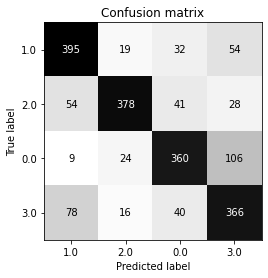

In [68]:
evaluatorclassifier(softmax_reg, X_test, y_test, X_train, y_train)

Train set score: 0.75
Test set score: 0.75
f1 score: 0.75
Accuracy: 0.750
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76       500
         1.0       0.86      0.75      0.81       501
         2.0       0.76      0.72      0.74       499
         3.0       0.66      0.73      0.69       500

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000



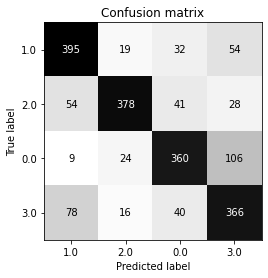

In [69]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)
evaluatorclassifier(softmax_reg, X_test, y_test, X_train, y_train)

# 3. Train a DecisionTree model able to predict the Gormiti_Land class.

In [70]:
param_grid = {'max_depth': [10, 20, 30, 50], "max_leaf_nodes":[100, 150, 200, 500], "min_samples_leaf":[5, 10, 25, 50, 150]}

tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)

### Since my computer is shit, i cant do the decision tree in the train dataset. im gonna use the validation one

In [71]:
tree_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'max_leaf_nodes': [100, 150, 200, 500],
                         'min_samples_leaf': [5, 10, 25, 50, 150]})

Train set score: 0.86
Test set score: 0.81
Best parameters: {'max_depth': 20, 'max_leaf_nodes': 100, 'min_samples_leaf': 5}
Best cross-validation score: 0.80
f1 score: 0.81
Accuracy: 0.812
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       500
         1.0       0.85      0.80      0.82       501
         2.0       0.82      0.78      0.80       499
         3.0       0.76      0.85      0.80       500

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



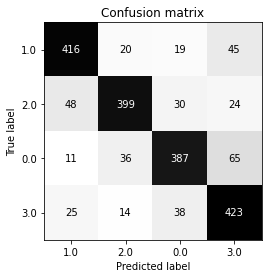

In [72]:
evaluatorclassifier(tree_clf, X_test, y_test, X_train, y_train)

Train set score: 0.86
Test set score: 0.81
f1 score: 0.81
Accuracy: 0.812
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       500
         1.0       0.85      0.80      0.82       501
         2.0       0.82      0.78      0.80       499
         3.0       0.76      0.85      0.80       500

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



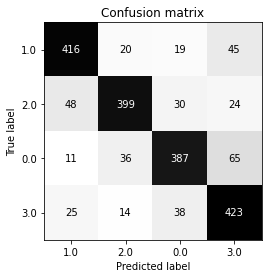

In [73]:
tree_clf = DecisionTreeClassifier(max_depth=50, max_leaf_nodes=100, min_samples_leaf=5)
tree_clf.fit(X_train, y_train)
evaluatorclassifier(tree_clf, X_test, y_test, X_train, y_train)

# 4. Train a Random Forest model able to predict the Gormiti_Land class.

In [74]:
param_grid = {'max_depth': [10, 20, 30, 50], "max_leaf_nodes":[100, 150, 200, 500], "min_samples_leaf":[5, 10, 25, 50, 150]}
rnd_clf = GridSearchCV(RandomForestClassifier(n_estimators= 50, oob_score=True, bootstrap=True), param_grid, cv=5, n_jobs=-1)


In [75]:
rnd_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'max_leaf_nodes': [100, 150, 200, 500],
                         'min_samples_leaf': [5, 10, 25, 50, 150]})

Train set score: 0.91
Test set score: 0.82
Best parameters: {'max_depth': 20, 'max_leaf_nodes': 500, 'min_samples_leaf': 5}
Best cross-validation score: 0.81
f1 score: 0.82
Accuracy: 0.822
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       500
         1.0       0.88      0.79      0.83       501
         2.0       0.84      0.74      0.79       499
         3.0       0.76      0.87      0.81       500

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



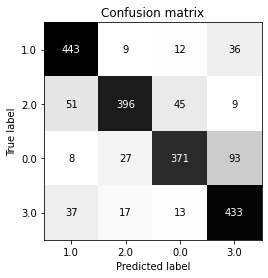

In [76]:
evaluatorclassifier(rnd_clf, X_test, y_test, X_train, y_train)

In [77]:
rnd_clf = RandomForestClassifier(n_jobs=-1, max_depth =  20, max_leaf_nodes =  500, min_samples_leaf =  5, n_estimators= 50, oob_score=True, bootstrap=True)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=500, min_samples_leaf=5,
                       n_estimators=50, n_jobs=-1, oob_score=True)

In [78]:
rnd_clf.oob_score_

0.7974778561777511

In [79]:
def bestkfeature(df, model):
    ftr = {}

    for name, score in zip(df.columns, model.feature_importances_):
        ftr[name]= score
    k = 2
    res = {key: val for key, val in sorted(ftr.items(), key = lambda ele: ele[1], reverse = True)}
    res = dict(list(res.items())[0: k])
    return res

In [80]:
print(bestkfeature(X_train, rnd_clf))

{'Against_Lava': 0.24697267976155943, 'Against_Fire': 0.18706660811343173}


Train set score: 0.91
Test set score: 0.83
f1 score: 0.83
Accuracy: 0.826
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       500
         1.0       0.89      0.78      0.83       501
         2.0       0.84      0.76      0.79       499
         3.0       0.76      0.87      0.81       500

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



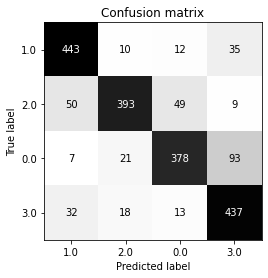

In [81]:
evaluatorclassifier(rnd_clf, X_test, y_test, X_train, y_train)

# 5. Train an AdaBoost model able to predict the Gormiti_Land class

In [82]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth =  50, max_leaf_nodes =  100, min_samples_leaf =  5), 
    n_estimators=50,
    algorithm="SAMME.R", 
    learning_rate=0.5)

    

ada_clf.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=50,
                                                         max_leaf_nodes=100,
                                                         min_samples_leaf=5),
                   learning_rate=0.5)

Train set score: 0.95
Test set score: 0.84
f1 score: 0.84
Accuracy: 0.842
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       500
         1.0       0.88      0.81      0.84       501
         2.0       0.84      0.82      0.83       499
         3.0       0.80      0.87      0.83       500

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



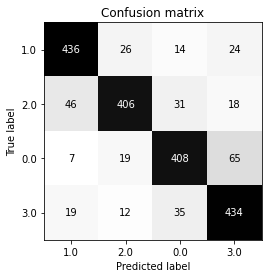

In [83]:
evaluatorclassifier(ada_clf, X_test, y_test, X_train, y_train)

# 6. Train a Soft Voting Classifier model able to predict the Gormiti_Land class.

In [84]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth =  50, max_leaf_nodes =  100, min_samples_leaf =  5), n_estimators=50,algorithm="SAMME.R", learning_rate=0.5)
rnd_clf = RandomForestClassifier(n_jobs=-1, max_depth =  20, max_leaf_nodes =  500, min_samples_leaf =  5, n_estimators= 50, oob_score=True, bootstrap=True)
tree_clf = DecisionTreeClassifier(max_depth=50, max_leaf_nodes=100, min_samples_leaf=5)
sft_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
voting_clf = VotingClassifier(estimators=[('ada', ada_clf), ('rf', rnd_clf), ('tre', tree_clf), ("sft", sft_clf)], voting='soft') ## we specify SOFT voting

for clf in (sft_clf, tree_clf, rnd_clf, ada_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7495
DecisionTreeClassifier 0.8125
RandomForestClassifier 0.821
AdaBoostClassifier 0.8405
VotingClassifier 0.8365


In [85]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth =  50, max_leaf_nodes =  100, min_samples_leaf =  5), n_estimators=50,algorithm="SAMME.R", learning_rate=0.5)
rnd_clf = RandomForestClassifier(n_jobs=-1, max_depth =  20, max_leaf_nodes =  500, min_samples_leaf =  5, n_estimators= 50, oob_score=True, bootstrap=True)
tree_clf = DecisionTreeClassifier(max_depth=50, max_leaf_nodes=100, min_samples_leaf=5)
sft_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

voting_clf = VotingClassifier(estimators=[('ada', ada_clf), ('rf', rnd_clf), ('tre', tree_clf), ("sft", sft_clf)], voting='hard') ## we specify HARD voting

for clf in (sft_clf, tree_clf, rnd_clf, ada_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7495
DecisionTreeClassifier 0.8125
RandomForestClassifier 0.8195
AdaBoostClassifier 0.8405
VotingClassifier 0.835
